<a href="https://colab.research.google.com/github/Ebimsv/Blood-cancer-detection/blob/main/vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, transforms
from torchvision.models import resnet18, resnet34
import os

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Section 1:Inference

In [ ]:
model = torchvision.models.detection.retinanet_resnet50_fpn(weights=True)
model.to(device)

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


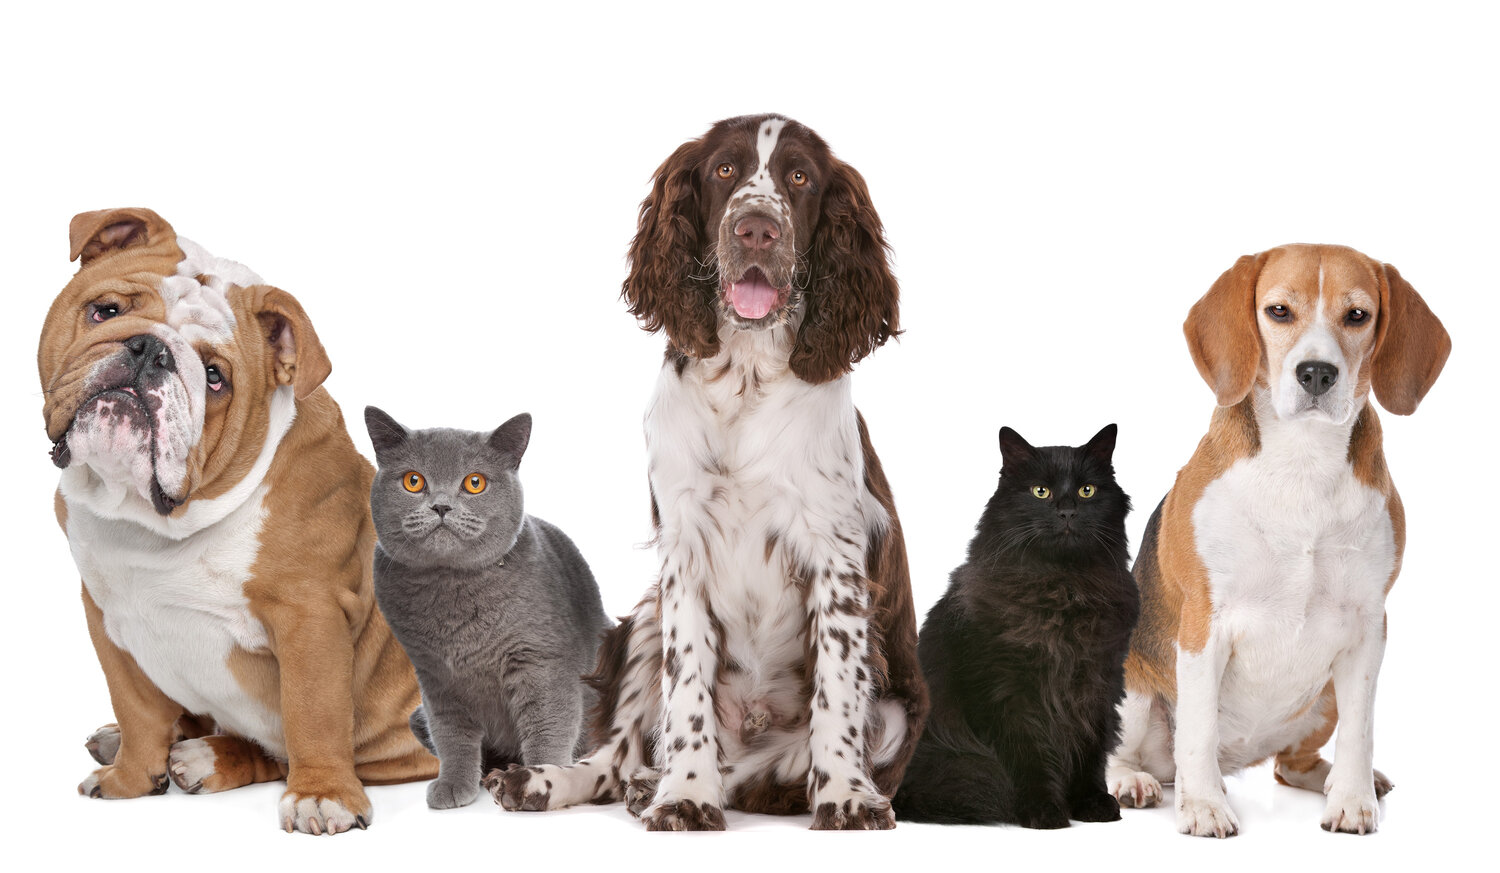

In [ ]:
from PIL import Image

img_pil = Image.open('/content/3+dogs+with+2+cats.jpg').convert('RGB')
display(img_pil)

In [ ]:
img_tensor = torchvision.transforms.functional.to_tensor(img_pil)
list_img = [img_tensor.to(device)]

model.eval()
with torch.no_grad():
    predictions = model(list_img)

predictions

[{'boxes': tensor([[ 529.7616,  108.9041,  914.4479,  827.8596],
          [1125.9930,  233.4080, 1451.1953,  842.4878],
          [  44.5402,  208.9611,  438.8870,  830.7477],
          [ 911.1482,  420.1888, 1151.9702,  829.4252],
          [ 368.2426,  403.8352,  621.7068,  807.6970],
          [ 742.9495,  166.0983, 1413.4445,  847.9648],
          [  71.2352,  203.9260,  791.9396,  827.9468],
          [ 524.5627,  111.4810,  923.2601,  839.0021],
          [ 402.7121,  249.6673,  763.8586,  812.8072],
          [ 524.5627,  111.4810,  923.2601,  839.0021],
          [ 967.7519,  354.1706, 1282.9873,  835.8712],
          [  45.5617,  213.2052,  441.0636,  818.1111],
          [  45.5617,  213.2052,  441.0636,  818.1111],
          [ 368.6807,  398.1448,  626.1776,  799.0319],
          [ 227.9706,  295.7577,  604.9489,  814.2446],
          [1133.1263,  237.6444, 1454.1471,  843.4691],
          [1127.9409,  218.9868, 1449.1505,  840.5534],
          [1127.9409,  218.9868, 1449.1

In [ ]:
boxes = predictions[0]['boxes'].cpu()
labels = predictions[0]['labels'].cpu()
scores = predictions[0]['scores'].cpu()

# Plot Bbox

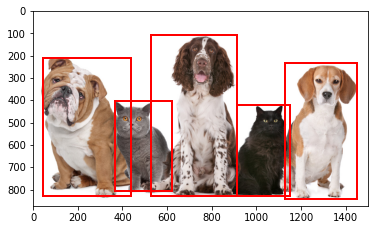

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

np_arr = img_tensor.permute(1, 2, 0).numpy()
plt.imshow(np_arr)

ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
  if score > 0.7:
      rect = Rectangle((box[0], box[1]),
                      (box[2] - box[0]),
                      (box[3] - box[1]),
                      fill=False,
                      edgecolor=(1, 0, 0),
                      linewidth=2)
      ax.add_patch(rect)

plt.show()